# **Welcome to our project report! ✨🧪**
## 🚀 *Overview*
🤯 Acquiring Dataset <br>
🧹 Cleaning Dataset <br>
🛟 Saving the cleaned data to a csv file <br>
🤓 Computation of RDKit Molecular Descriptors <br>
💡 Formatting the dataset for machine learning <br>
🕹️ Machine learning model selection <br>
🌲 Machine learning model 🥇: ExtraTreesRegressor <br>
🤖 Machine learning model 🥈 : LGBMRegressor <br>
🧐 Comparison of the two machine learning models <br>



## 🤯 *Acquiring Dataset*
In a first step, we will acquire the [pKa dataset](https://github.com/cbio3lab/pKa/blob/main/Data/test_acids_bases_descfinal_nozwitterions.csv) from cbio3lab's repository, initially extracted from the Harvard [dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/6A67L9).

Next, we will perform an exploratory analysis of the collected dataset.

1) Let's download the data directly into your working directory:

In [136]:
import requests
from pathlib import Path

# Correct raw file URL
url = "https://raw.githubusercontent.com/anastasiafloris/pKaPredict/main/data/pkadatasetRAWDATA.csv"

# Get the repository root by going up one level from the current working directory
repo_root = Path.cwd().parent  # Moves one level up from "notebooks" (if running from there)

# Define the correct save directory inside the repo's "data" folder
save_dir = repo_root / "data"
save_dir.mkdir(parents=True, exist_ok=True)  # Ensure the "data" folder exists

# Define the full file path
file_path = save_dir / "pkadatasetRAWDATA.csv"

try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an error if the request fails

    # Check if the content is an HTML page (meaning it's the wrong link)
    if "<!DOCTYPE html>" in response.text:
        print("❌ Error: This is an HTML page, not the CSV file. Check your URL.")
    else:
        with open(file_path, "wb") as file:  # Save inside "data" folder of the repo
            file.write(response.content)
        print(f"✅ File downloaded successfully: {file_path}")

except requests.exceptions.RequestException as e:
    print(f"❌ Failed to download file: {e}")


✅ File downloaded successfully: /Users/anastasiafloris/Desktop/pKaPredict/pKaPredict/data/pkadatasetRAWDATA.csv


2) Let's open the file and verify its existence as well as display a preview of the latter:

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Define the current working directory
current_directory = Path.cwd()
print("Current Directory:", current_directory.resolve())

# Specify the path to the dataset file (as a string)
file_path = os.path.join("..", "data", "pkadatasetRAWDATA.csv")

# Convert file_path (string) to a Path object before checking existence
file_path_obj = Path(file_path)

# Verify the file's existence and read its contents if available
if file_path_obj.exists():  # ✅ Use the Path object to check existence
    print("The dataset file exists. Reading the file contents...\n")
    
    # Open and display the contents (optional, for verification)
    with file_path_obj.open("r", encoding="utf-8") as file:  # ✅ Use Path object to open
        content = file.read()
        print(content[:100])  # Print only the first 100 characters for preview
    
    # Load the dataset using pandas
    try:
        data_pka = pd.read_csv(file_path, delimiter=",")  # ✅ Still using the original string path
        print("\n✅ Dataset successfully loaded. Preview:")
        
        # Display interactive scrollable table in VS Code/Jupyter
        from IPython.display import display
        display(data_pka.head(10))  # Display first 10 rows
        
    except Exception as e:
        print(f"❌ Error loading dataset: {e}")

else:
    print("❌ Error: The specified file does not exist.")




Current Directory: /Users/anastasiafloris/Desktop/pKaPredict/pKaPredict/notebooks
The dataset file exists. Reading the file contents...

Compound,set,Smiles,pka,prot_smiles,deprot_smiles,acid_base_type,acid_base_string,prot_charge,deprot

✅ Dataset successfully loaded. Preview:


,Compound,set,Smiles,pka,prot_smiles,deprot_smiles,acid_base_type,acid_base_string,prot_charge,deprot_charge,...,ATSm5,ATSc1,ATSc2,ATSc3,ATSc4,ATSc5,nHBDon,nHBAcc,bpol,apol
0,4,test,Brc1ccc(-c2nn[nH]n2)cc1,3.73,Brc1ccc(-c2nn[nH]n2)cc1,Brc1ccc(-c2nn[n-]n2)cc1,acidic,A,0,-1,...,16.98,0.09,-0.05,0.01,0.01,0.00,1,3,7.42,23.10
1,6,test,Brc1ccc(C2NCCS2)cc1,5.05,Brc1ccc(C2NCCS2)cc1,Brc1ccc(C2[NH2+]CCS2)cc1,basic,B,1,0,...,19.32,0.11,-0.07,0.02,0.01,0.00,1,1,15.16,29.56
2,7,test,Brc1ccc(Cc2c3ccccc3nc3ccccc23)cc1,7.00,Brc1ccc(Cc2c3ccccc3[nH+]c3ccccc23)cc1,Brc1ccc(Cc2c3ccccc3nc3ccccc23)cc1,basic,B,1,0,...,37.15,0.09,-0.04,-0.01,0.02,-0.01,0,1,17.91,48.69
3,18,test,Brc1cccc(Br)c1N(C1=NCCN1)C1CCCCC1,11.30,Brc1cccc(Br)c1N(C1=[NH+]CCN1)C1CCCCC1,Brc1cccc(Br)c1N(C1=NCCN1)C1CCCCC1,basic,B,1,0,...,111.84,0.24,-0.17,0.10,-0.04,-0.07,1,3,27.31,48.47
4,21,test,Brc1cccc(Br)c1N(CC1CCCC1)C1=NCCN1,10.90,Brc1cccc(Br)c1N(CC1CCCC1)C1=[NH+]CCN1,Brc1cccc(Br)c1N(CC1CCCC1)C1=NCCN1,basic,B,1,0,...,108.67,0.24,-0.18,0.11,-0.05,-0.07,1,3,27.31,48.47
5,29,test,Brc1ccccc1-c1nn[nH]n1,3.83,Brc1ccccc1-c1nn[nH]n1,Brc1ccccc1-c1nn[n-]n1,acidic,A,0,-1,...,32.50,0.09,-0.04,0.01,-0.04,0.02,1,3,7.42,23.10
6,35,test,Brc1cncc2ccccc12,3.54,Brc1c[nH+]cc2ccccc12,Brc1cncc2ccccc12,basic,B,1,0,...,26.29,0.10,-0.05,-0.02,0.03,-0.01,0,1,9.17,23.99
7,41,test,C#CC(C)(C)N(C)C(C)(C)C#C,6.65,C#CC(C)(C)N(C)C(C)(C)C#C,C#CC(C)(C)[NH+](C)C(C)(C)C#C,basic,B,1,0,...,13.00,0.11,-0.07,0.02,0.00,-0.00,0,1,20.56,31.80
8,52,test,C#CCCCC(=O)O,4.60,C#CCCCC(=O)O,C#CCCCC(=O)[O-],acidic,A,0,-1,...,4.66,0.20,-0.09,0.01,0.00,-0.06,1,2,9.70,17.50
9,62,test,C#CCCN,9.23,C#CCC[NH3+],C#CCCN,basic,B,1,0,...,1.17,0.05,-0.01,-0.02,0.01,0.00,1,1,6.99,12.81


## 🧹 *Cleaning Dataset*

✅ Prints initial dataset shape <br> 
✅ Counts and removes missing values (NaN) and duplicates <br>
✅ Prints final dataset shape after cleaning  <br>
✅ Generates a histogram to visualize pKa value distribution  <br>

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the dataset
file_path = os.path.join("..", "data", "pkadatasetRAWDATA.csv")

try:
    data_pka = pd.read_csv(file_path, sep=None, engine="python")  # Auto-detect delimiter
    print("✅ Dataset successfully loaded.")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    data_pka = None

# Function to clean, remove duplicates, and visualize pKa distribution
def clean_and_visualize_pka(data_pka):
    """Cleans dataset by removing NaN values, duplicates, and visualizes pKa distribution."""
    
    if data_pka is None or data_pka.empty:
        print("❌ Error: Dataset is empty or not loaded.")
        return

    # Check initial shape
    print("\n🔹 Checking dataset information:")
    print(f"Initial dataset shape: {data_pka.shape}")

    # Ensure necessary columns exist
    required_columns = {"Smiles", "pka", "acid_base_type"}
    missing_columns = required_columns - set(data_pka.columns)
    if missing_columns:
        print(f"❌ Error: Missing required columns: {missing_columns}")
        return None
    
    # Select only the relevant columns and create a copy
    data_pka = data_pka[list(required_columns)].copy()
    
    # Check for missing values
    missing_values = data_pka.isnull().sum()
    print(f"\nMissing values before cleaning:\n{missing_values}")
    

    # Ensure "pka" column exists (case-sensitive)
    if "pka" not in data_pka.columns:
        print("❌ Error: 'pka' column not found in dataset.")
        return
    
    # Check for missing values
    missing_values = data_pka["pka"].isnull().sum()
    print(f"\nTotal missing values in 'pka': {missing_values}")

    # Drop NaN values
    data_pka.dropna(subset=["pka"], inplace=True)

    # Remove duplicates
    initial_rows = data_pka.shape[0]
    data_pka.drop_duplicates(inplace=True)
    final_rows = data_pka.shape[0]
    duplicates_removed = initial_rows - final_rows
    print(f"\nTotal duplicate rows removed: {duplicates_removed}")

    
    # Check final shape after cleaning
    print(f"Dataset shape after NaN and duplicate removal: {data_pka.shape}")

   
     

✅ Dataset successfully loaded.


📊 Present the pKa dataset as a histogram:


📊 Generating histogram for pKa distribution...



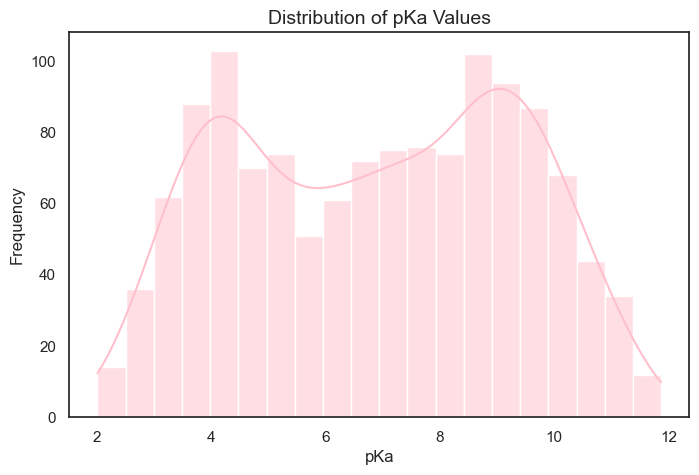

📁 Histogram saved successfully at: ../notebooks/Plots/pKa_distribution_of_the_dataset.png


In [139]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Generate histogram for pKa distribution
print("\n📊 Generating histogram for pKa distribution...\n")

# Set white background (removes grey Seaborn style)
sns.set_theme(style="white")

# Create figure
plt.figure(figsize=(8, 5))
sns.histplot(data=data_pka, x="pka", binwidth=0.5, kde=True, color="pink")  # Pink color

# Improve visual appearance
plt.xlabel("pKa", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of pKa Values", fontsize=14)
plt.grid(False)  # Removes any unwanted grid lines

# Define save path in the specified folder
save_path = os.path.join("..", "notebooks", "Plots", "pKa_distribution_of_the_dataset.png")

# Save histogram as PNG
plt.savefig(save_path, dpi=300, bbox_inches="tight")

# Show plot
plt.show()

# Success message
print(f"📁 Histogram saved successfully at: {save_path}")



## 🛟 *Saving the cleaned data to a CSV file*

In [140]:
# Call the function
cleaned_data = clean_and_visualize_pka(data_pka)

# Save the cleaned dataset to the correct folder inside your package
if cleaned_data is not None:
    save_path = os.path.join("..", "data", "pKadata_cleaned.csv")  # Ensure the correct path



    # Save as CSV
    cleaned_data.to_csv(save_path, index=False)
    print(f"✅ Cleaned dataset successfully saved at: {save_path}")


🔹 Checking dataset information:
Initial dataset shape: (1297, 274)

Missing values before cleaning:
acid_base_type    0
pka               0
Smiles            0
dtype: int64

Total missing values in 'pka': 0

Total duplicate rows removed: 0
Dataset shape after NaN and duplicate removal: (1297, 3)


## 🤓 *Computation of RDKit Molecular Descriptors*
Molecular descriptors are essential for pKa prediction using machine learning because they provide numerical representations of molecular structures, enabling the model to identify patterns and correlations between molecular features and pKa values.

In [143]:
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd
from tqdm import tqdm

def RDkit_descriptors(smiles):
    """
    Compute RDKit molecular descriptors for a list of SMILES strings.

    Args:
        smiles (list): List of SMILES strings.

    Returns:
        tuple: (List of computed descriptor values, List of descriptor names)
    """
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors = []
    for mol in tqdm(mols, desc="Computing Molecular Descriptors"):
        if mol is not None:
            mol = Chem.AddHs(mol)  # Add hydrogens for better accuracy
            descriptors = calc.CalcDescriptors(mol)
            Mol_descriptors.append(descriptors)
        else:
            Mol_descriptors.append([None] * len(desc_names))  # Handle invalid SMILES

    return Mol_descriptors, desc_names

# Load cleaned data containing SMILES
file_path_cleaned = os.path.join("..", "data", "pKadata_cleaned.csv")
cleaned_data = pd.read_csv(file_path_cleaned)

# Compute descriptors
Mol_descriptors, desc_names = RDkit_descriptors(cleaned_data['Smiles'])

# Create DataFrame with descriptors and add SMILES column
df_descriptors = pd.DataFrame(Mol_descriptors, columns=desc_names)
df_descriptors.insert(0, "Smiles", cleaned_data['Smiles'])  # Insert Smiles as the first column

# Save descriptors as CSV file in pkapredict/data
save_path = os.path.join("..", "data", "Data_pKa_Descriptors.csv")
df_descriptors.to_csv(save_path, index=False)

print("Descriptor computation completed.")
print(f"Training data descriptors saved as '{save_path}'.")


Computing Molecular Descriptors: 100%|██████████| 1297/1297 [00:24<00:00, 52.41it/s]


Descriptor computation completed.
Training data descriptors saved as '../data/Data_pKa_Descriptors.csv'.


## 💡 *Formatting the dataset for machine learning*
This section of the code prepares the dataset for training a machine learning model by splitting it into training and validation sets and standardizing the features.

In [144]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define file paths
file_path1 = os.path.join("..", "data", "Data_pKa_Descriptors.csv")  # Descriptors (X)
file_path2 = os.path.join("..", "data", "pKadata_cleaned.csv")  # pKa values (y)

# Load the datasets
df_descriptors = pd.read_csv(file_path1)  # Features (X)
df_pKa = pd.read_csv(file_path2)  # Target values (y)

# Display first few rows of both datasets
print("Descriptors DataFrame:\n", df_descriptors.head())
print("pKa DataFrame:\n", df_pKa.head())

# Ensure the 'Smiles' column is present in both
common_column = 'Smiles'

# Merge descriptors with pKa values using 'Smiles'
df_merged = df_descriptors.merge(df_pKa[['pka', common_column]], on=common_column)

# Drop non-numeric columns (Smiles)
X = df_merged.drop(columns=['pka', 'Smiles'])  # Drop pKa (target) and Smiles (string)
y = df_merged['pka']  # Target variable (pKa values)

# Verify all columns are numeric
print("X columns before standardization:", X.dtypes)

# Split data into training (90%) and validation (10%) sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Print shape to confirm data processing
print(f"Training set shape: {X_train.shape}, Validation set shape: {X_valid.shape}")

# Success message 🎀
print("The training and validation sets have been successfully created 🎀")


Descriptors DataFrame:
                               Smiles  MaxAbsEStateIndex  MaxEStateIndex  \
0            Brc1ccc(-c2nn[nH]n2)cc1               7.72            7.72   
1                Brc1ccc(C2NCCS2)cc1               8.28            8.28   
2  Brc1ccc(Cc2c3ccccc3nc3ccccc23)cc1               9.01            9.01   
3  Brc1cccc(Br)c1N(C1=NCCN1)C1CCCCC1               9.19            9.19   
4  Brc1cccc(Br)c1N(CC1CCCC1)C1=NCCN1               8.93            8.93   

   MinAbsEStateIndex  MinEStateIndex  qed   SPS  MolWt  HeavyAtomMolWt  \
0               0.07           -0.27 0.80 15.92 225.05          220.01   
1               0.04           -2.84 0.81 51.08 244.16          234.08   
2               0.22           -3.03 0.42 20.77 348.24          334.13   
3               0.06           -4.12 0.80 53.20 401.15          381.99   
4               0.05           -4.13 0.82 50.80 401.15          381.99   

   ExactMolWt  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0

## 🕹️ *Machine learning model selection*

 98%|█████████▊| 41/42 [00:58<00:01,  1.11s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003782 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19271
[LightGBM] [Info] Number of data points in the train set: 1167, number of used features: 176
[LightGBM] [Info] Start training from score 6.913366


100%|██████████| 42/42 [00:58<00:00,  1.40s/it]


📁 Figure saved successfully at: ../notebooks/Plots/Top10MLModels.png


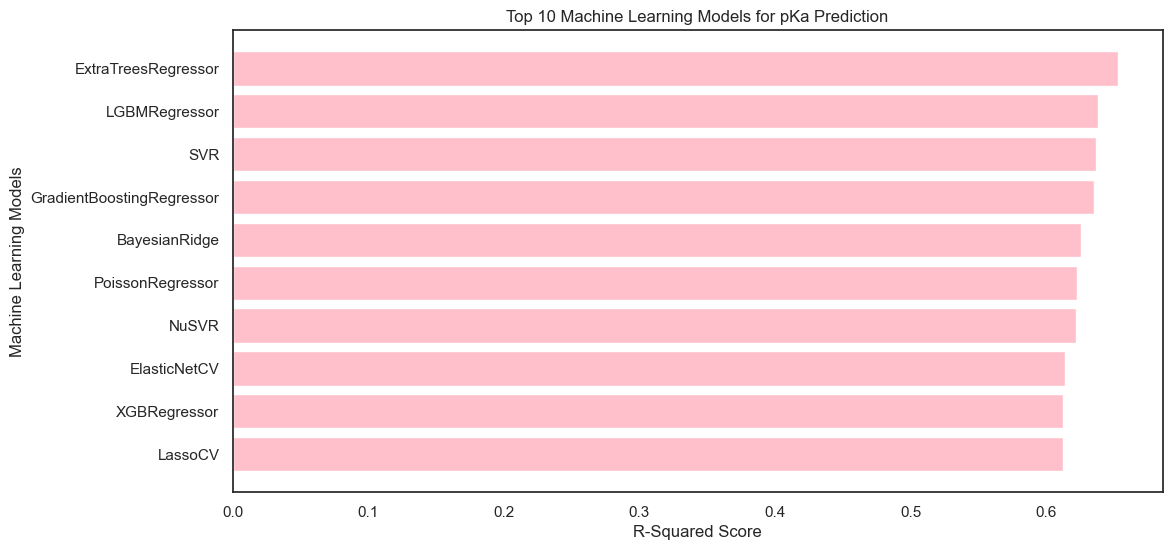

Model selection completed! 🎯 The best-performing models have been visualized and saved as 'Top10MLModels.png'.


In [145]:
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor
import os

# =============================
# Run LazyRegressor (Including XGBoost)
# =============================

# Initialize LazyRegressor
lregs = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None, random_state=42)

# Fit models on the pKa dataset
models, prediction_tests = lregs.fit(X_train_scaled, X_valid_scaled, y_train, y_valid)

# =============================
# Visualize Top Models
# =============================

# Sort models by R-squared score (best performing first)
models_sorted = models.sort_values(by="R-Squared", ascending=False)

# Plot top 10 models
plt.figure(figsize=(12, 6))
plt.barh(models_sorted.index[:10], models_sorted["R-Squared"][:10], align='center', color='pink')
plt.xlabel("R-Squared Score")
plt.ylabel("Machine Learning Models")
plt.title("Top 10 Machine Learning Models for pKa Prediction")
plt.gca().invert_yaxis()  # Best model on top


# Define save path in the specified folder
save_path = os.path.join("..", "notebooks", "Plots", "Top10MLModels.png")

# Save figure as PNG in the correct directory
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Success message
print(f"📁 Figure saved successfully at: {save_path}")



# Show plot
plt.show()

# =============================
# Success Message
# =============================

print("Model selection completed! 🎯 The best-performing models have been visualized and saved as 'Top10MLModels.png'.")


## 🌲 *Machine learning model 🥇 : ExtraTreesRegressor*

In [146]:
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

# =============================
# 1st Grid Search for ExtraTreesRegressor
# =============================

# Define initial hyperparameter grid
params = {
    "max_depth": list(range(15, 26, 5)),  # Trying depths between 10 and 30
    "n_estimators": list(range(100, 500, 100)),  # Number of trees between 100 and 500
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    ExtraTreesRegressor(random_state=42),
    param_grid=params,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Print best hyperparameters
print("Optimized parameters for ExtraTreesRegressor:", grid_search.best_params_)

# =============================
# 2nd Grid Search for Further Optimization
# =============================

# Extract best hyperparameters from first search
best_params = grid_search.best_params_

# Define refined hyperparameter grid
params_bst = {
    "max_depth": list(range(best_params["max_depth"] - 2, best_params["max_depth"] + 3, 1)),
    "n_estimators": list(range(best_params["n_estimators"] - 50, best_params["n_estimators"] + 100, 50)),
    "min_samples_split": [best_params["min_samples_split"] - 1, best_params["min_samples_split"], best_params["min_samples_split"] + 1],
}

# Initialize refined GridSearchCV
grid_search_bst = GridSearchCV(
    ExtraTreesRegressor(random_state=42),
    param_grid=params_bst,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search_bst.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("The best parameters after further optimization:", grid_search_bst.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Optimized parameters for ExtraTreesRegressor: {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 3 folds for each of 45 candidates, totalling 135 fits
The best parameters after further optimization: {'max_depth': 23, 'min_samples_split': 2, 'n_estimators': 150}


The hyperparameter tuning for ExtraTreesRegressor was conducted in two stages to identify the optimal parameters for predicting pKa values efficiently. In the first grid search, we tested 36 different hyperparameter combinations using 3-fold cross-validation (cv=3) instead of 5-fold to significantly reduce computational time while maintaining accuracy. This resulted in an initial best model with max_depth = 25, min_samples_split = 2, and n_estimators = 100. To further refine the model, a second grid search was conducted, focusing on a narrower range of max_depth (15 to 26 instead of 10 to 31) and adjusting n_estimators, leading to the final optimized values: max_depth = 23, min_samples_split = 2, and n_estimators = 150. These refinements balanced model complexity and efficiency, ensuring improved generalization while significantly reducing training time. 🚀

Plot saved as validation_ExtraTrees.png


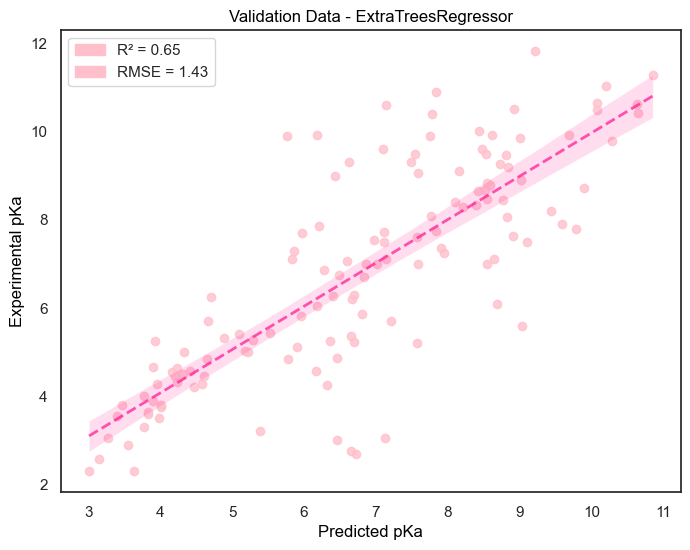

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os

# =============================
# Train ExtraTreesRegressor with Optimized Parameters
# =============================

# Define the best parameters found from GridSearchCV
best_params = {'max_depth': 23, 'min_samples_split': 2, 'n_estimators': 150}

# Initialize the model with optimized parameters
model = ExtraTreesRegressor(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    random_state=42
)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_preds = model.predict(X_valid_scaled)

# =============================
# Define Function for Plotting
# =============================

def plot_data(actual, predicted, title):
    """Plots predicted vs actual pKa values with regression line and evaluation metrics."""
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    R2 = r2_score(actual, predicted)

    plt.figure(figsize=(8, 6))
    sn.regplot(x=predicted, y=actual, scatter_kws={'color': 'pink'}, line_kws={"lw": 2, "ls": "--", "color": "deeppink", "alpha": 0.7})
    plt.title(title, color="black")
    plt.xlabel("Predicted pKa", color="black")
    plt.ylabel("Experimental pKa", color="black")
    plt.gca().set_facecolor('white')  # Set background to white

    # Add R² and RMSE patches to legend
    R2_patch = mpatches.Patch(color='pink', label=f"R² = {R2:.2f}")
    rmse_patch = mpatches.Patch(color='pink', label=f"RMSE = {rmse:.2f}")
    plt.legend(handles=[R2_patch, rmse_patch])

# =============================
# Plot and Save Results
# =============================

# Plot validation results
plot_data(y_valid, y_preds, "Validation Data - ExtraTreesRegressor")

# Define save path in the specified folder
save_path = os.path.join("..", "notebooks", "Plots", "validation_ExtraTrees.png")

# Save figure as PNG in the correct directory
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Success message
print("Plot saved as validation_ExtraTrees.png")

📶 Let's try to optimize another parameter of this model! We can select the most relavent descriptors to pKa prediction using SelectKBest. The following code plots all R squared values as a function of k values and prints the optimal one.

Optimal k: 95 with Highest R²: 0.6738
Plot saved as optimalkvalue.png


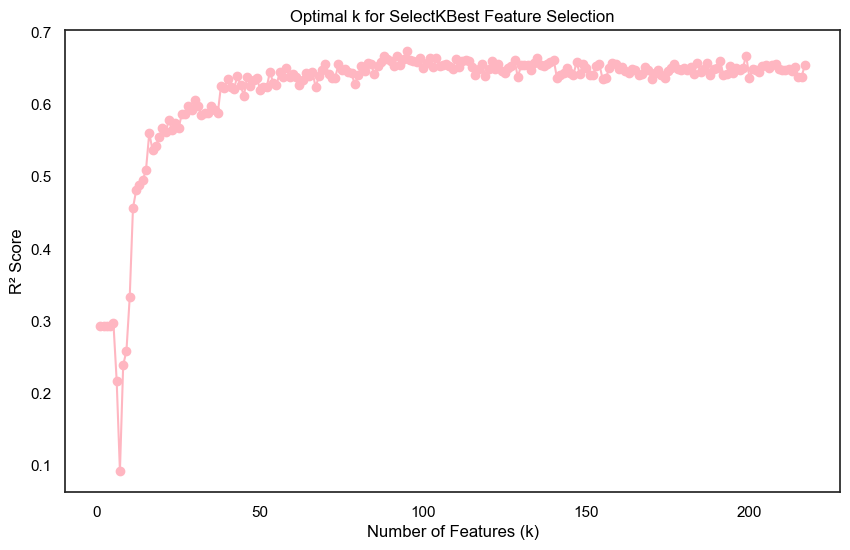

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
import os

# Define range of k values (from 1 to total number of features, step 1)
k_values = list(range(1, X_train_scaled.shape[1] + 1))

# Store R² scores for each k
r2_scores = []

# Loop through k values and train ExtraTreesRegressor
for k in k_values:
    # Select top k features
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_valid_selected = selector.transform(X_valid_scaled)

    # Train ExtraTreesRegressor with selected features
    model = ExtraTreesRegressor(n_estimators=150, max_depth=23, min_samples_split=2, random_state=42)
    model.fit(X_train_selected, y_train)

    # Make predictions
    y_preds = model.predict(X_valid_selected)

    # Compute R² score
    r2 = r2_score(y_valid, y_preds)
    r2_scores.append(r2)

# Find the optimal k value
optimal_k = k_values[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

# Print optimal k value with highest R²
print(f"Optimal k: {optimal_k} with Highest R²: {best_r2:.4f}")

# Plot R² Scores vs. k Values
plt.figure(figsize=(10, 6))
plt.plot(k_values, r2_scores, marker='o', linestyle='-', color='lightpink')
plt.xlabel("Number of Features (k)", color="black")
plt.ylabel("R² Score", color="black")
plt.title("Optimal k for SelectKBest Feature Selection", color="black")
plt.gca().set_facecolor('white')  # Set background to white
plt.tick_params(axis='both', colors='black')  # Set axes color to black

# Define save path in the specified folder
save_path = os.path.join("..", "notebooks", "Plots", "optimalkvalue.png")

# Save figure as PNG in the correct directory
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Success message
print("Plot saved as optimalkvalue.png")


💪🏻 Let's plot the data with the optimized machine leaning parameters of this model!

Plot saved as validationoptimized_ExtraTrees.png


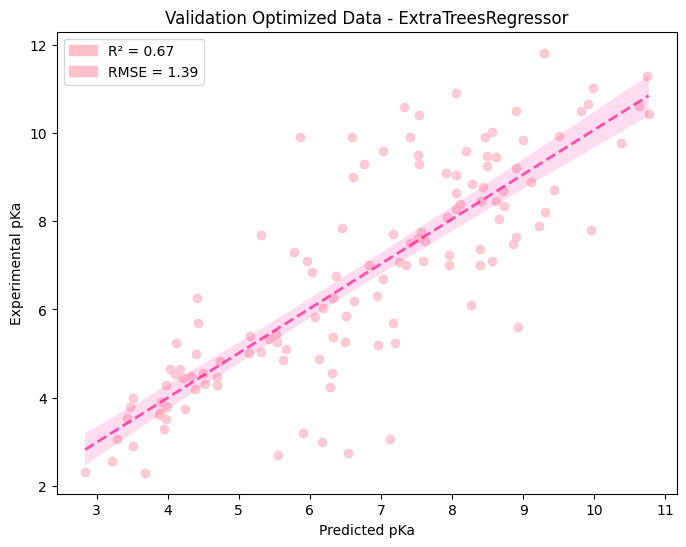

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import os

# =============================
# Feature Selection with SelectKBest (k=95)
# =============================

k = 95  # Number of best features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_valid_selected = selector.transform(X_valid_scaled)

# =============================
# Train ExtraTreesRegressor with Optimized Parameters
# =============================

# Define the best parameters found from GridSearchCV
best_params = {'max_depth': 23, 'min_samples_split': 2, 'n_estimators': 150}

# Initialize the model with optimized parameters
model = ExtraTreesRegressor(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    random_state=42
)

# Train the model on the selected features
model.fit(X_train_selected, y_train)

# Make predictions on the validation set
y_preds = model.predict(X_valid_selected)

# =============================
# Define Function for Plotting
# =============================

def plot_data(actual, predicted, title):
    """Plots predicted vs actual pKa values with regression line and evaluation metrics."""
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    R2 = r2_score(actual, predicted)

    plt.figure(figsize=(8, 6))
    sn.regplot(x=predicted, y=actual, scatter_kws={'color': 'pink'}, line_kws={"lw": 2, "ls": "--", "color": "deeppink", "alpha": 0.7})
    plt.title(title, color="black")
    plt.xlabel("Predicted pKa", color="black")
    plt.ylabel("Experimental pKa", color="black")
    plt.gca().set_facecolor('white')  # Set background to white

    # Add R² and RMSE patches to legend
    R2_patch = mpatches.Patch(color='pink', label=f"R² = {R2:.2f}")
    rmse_patch = mpatches.Patch(color='pink', label=f"RMSE = {rmse:.2f}")
    plt.legend(handles=[R2_patch, rmse_patch])

# =============================
# Plot and Save Results
# =============================

# Plot validation results
plot_data(y_valid, y_preds, "Validation Optimized Data - ExtraTreesRegressor")

# Define save path in the specified folder
save_path = os.path.join("..", "notebooks", "Plots", "validationoptimized_ExtraTrees.png")

# Save figure as PNG in the correct directory
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Success message
print("Plot saved as validationoptimized_ExtraTrees.png")






In [60]:

import matplotlib.pyplot as plt
from scipy import stats
import os
import IPython.display as ipd


# =============================
# Compute Model Performance Metrics
# =============================

# Compute mean error
mean_error = np.mean(y_preds - y_valid)

# Compute variance of the error
variance_error = np.var(y_preds - y_valid)

# Compute mean predicted value
mean_predicted = np.mean(y_preds)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_valid, y_preds)

# Compute R² score
r2 = r2_score(y_valid, y_preds)

# Compute 95% confidence interval for predictions
confidence = 0.95
n = len(y_preds)
std_err = stats.sem(y_preds - y_valid)
margin_of_error = std_err * stats.t.ppf((1 + confidence) / 2., n-1)
confidence_interval = (mean_error - margin_of_error, mean_error + margin_of_error)

# Print computed metrics
print(f"Mean Error: {mean_error:.4f}")
print(f"Variance of Error: {variance_error:.4f}")
print(f"Mean Predicted Value: {mean_predicted:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
print(f"95% Confidence Interval: {confidence_interval}")

# Create a DataFrame for storing the results
stats_df = pd.DataFrame({
    "Metric": ["Mean Error", "Variance", "Mean Predicted Value", "MSE", "R²", "95% CI Lower", "95% CI Upper"],
    "Value": [mean_error, variance_error, mean_predicted, mse, r2, confidence_interval[0], confidence_interval[1]]
})

# Define save path dynamically
stats_save_path = os.path.join("..", "data", "ExtraTreesRegressor_stats.csv")
stats_df.to_csv(stats_save_path, index=False)
print(f"Table saved at: {stats_save_path}")

# Display as an interactive HTML table
ipd.display(ipd.HTML(stats_df.to_html(classes='table table-striped', escape=False)))




Mean Error: -0.0339
Variance of Error: 1.9210
Mean Predicted Value: 6.7538
MSE: 1.9222
R²: 0.6738
95% Confidence Interval: (np.float64(-0.2753287801671801), np.float64(0.20755466782535487))
Table saved at: ../data/ExtraTreesRegressor_stats.csv


,Metric,Value
0,Mean Error,-0.033887
1,Variance,1.921018
2,Mean Predicted Value,6.753767
3,MSE,1.922167
4,R²,0.673778
5,95% CI Lower,-0.275329
6,95% CI Upper,0.207555


## 🤖 *Machine learning model 🥈 : LGBMRegressor*

In [61]:
import numpy as np
import pandas as pd
import os
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import time

# =============================
# Load and Prepare Data
# =============================

# Define file paths
file_path1 = os.path.join("..", "data", "Data_pKa_Descriptors.csv")  # Descriptors (X)
file_path2 = os.path.join("..", "data", "pKadata_cleaned.csv")  # pKa values (y)

# Load the datasets
df_descriptors = pd.read_csv(file_path1)  # Features (X)
df_pKa = pd.read_csv(file_path2)  # Target values (y)

# Merge descriptors with pKa values using 'Smiles'
df_merged = df_descriptors.merge(df_pKa[['pka', 'Smiles']], on='Smiles')

# Drop non-numeric columns (Smiles)
X = df_merged.drop(columns=['pka', 'Smiles'])  # Drop pKa (target) and Smiles (string)
y = df_merged['pka']  # Target variable (pKa values)

# Split data into training (90%) and validation (10%) sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Convert back to DataFrame to avoid warnings in prediction
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_valid_scaled_df = pd.DataFrame(X_valid_scaled, columns=X.columns)

# =============================
# 1st Grid Search for LGBMRegressor (Optimized for Speed)
# =============================

# Start timing
start_time = time.time()

# Define initial hyperparameter grid with reduced values for speed
params = {
    "max_depth": [10, 15],  # Smaller range
    "n_estimators": [100, 200],  # Fewer estimators
    "learning_rate": [0.05, 0.1],  # Limited choices
    "num_leaves": [20, 31],  # Small variation
    "min_child_samples": [10, 20]  # Small variation
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    LGBMRegressor(random_state=42, verbose=-1),  # Suppress LightGBM output
    param_grid=params,
    cv=2,  # Reduced for speed
    verbose=0,  # Suppress printing
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled_df, y_train)

# Print best hyperparameters
print("Optimized parameters for LGBMRegressor:", grid_search.best_params_)

# =============================
# 2nd Grid Search for Further Optimization
# =============================

# Extract best hyperparameters from first search
best_params = grid_search.best_params_

# Define refined hyperparameter grid
params_bst = {
    "max_depth": [best_params["max_depth"] - 1, best_params["max_depth"], best_params["max_depth"] + 1],
    "n_estimators": [best_params["n_estimators"] - 50, best_params["n_estimators"] + 50],
    "learning_rate": [best_params["learning_rate"] * 0.9, best_params["learning_rate"], best_params["learning_rate"] * 1.1],
    "num_leaves": [best_params["num_leaves"] - 5, best_params["num_leaves"] + 5],
    "min_child_samples": [best_params["min_child_samples"] - 5, best_params["min_child_samples"] + 5]
}

# Initialize refined GridSearchCV
grid_search_bst = GridSearchCV(
    LGBMRegressor(random_state=42, verbose=-1),  # Suppress LightGBM output
    param_grid=params_bst,
    cv=2,  # Reduced for speed
    verbose=0,  # Suppress printing
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search_bst.fit(X_train_scaled_df, y_train)

# Print the best hyperparameters
print("The best parameters after further optimization:", grid_search_bst.best_params_)

# End timing
end_time = time.time()
print(f"Total execution time: {end_time - start_time:.2f} seconds")

Optimized parameters for LGBMRegressor: {'learning_rate': 0.05, 'max_depth': 10, 'min_child_samples': 10, 'n_estimators': 200, 'num_leaves': 20}
The best parameters after further optimization: {'learning_rate': 0.045000000000000005, 'max_depth': 9, 'min_child_samples': 5, 'n_estimators': 250, 'num_leaves': 15}
Total execution time: 242.45 seconds


🥳 We will now implement the optimized parameters and plot the data distribution as well as the associated R2 value

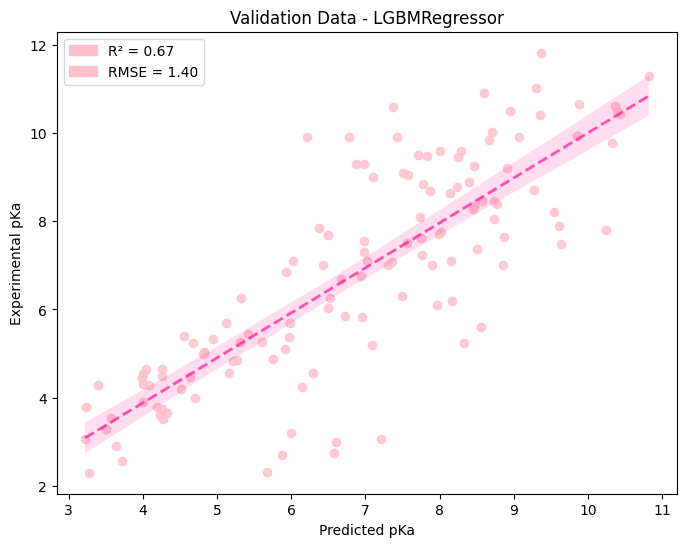

Plot saved as validation_LGBMRegressor.png


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.patches as mpatches
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os

# =============================
# Train LGBMRegressor with Optimized Parameters
# =============================

# Define the best parameters found from GridSearchCV
best_params = {
    'learning_rate': 0.045000000000000005,
    'max_depth': 9,
    'min_child_samples': 5,
    'n_estimators': 250,
    'num_leaves': 15
}

# Initialize the model with optimized parameters
model = LGBMRegressor(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_child_samples=best_params['min_child_samples'],
    n_estimators=best_params['n_estimators'],
    num_leaves=best_params['num_leaves'],
    random_state=42,
    verbose=-1  # Suppress output
)

# Train the model
model.fit(X_train_scaled_df, y_train)

# Make predictions on the validation set
y_preds = model.predict(X_valid_scaled_df)

# =============================
# Define Function for Plotting
# =============================

def plot_data(actual, predicted, title, save_path, show_plot=True):
    """Plots predicted vs actual pKa values with regression line and evaluation metrics."""
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    R2 = r2_score(actual, predicted)

    plt.figure(figsize=(8, 6))
    sn.regplot(x=predicted, y=actual, scatter_kws={'color': 'pink'}, line_kws={"lw": 2, "ls": "--", "color": "deeppink", "alpha": 0.7})
    plt.title(title, color="black")
    plt.xlabel("Predicted pKa", color="black")
    plt.ylabel("Experimental pKa", color="black")
    plt.gca().set_facecolor('white')  # Set background to white

    # Add R² and RMSE patches to legend
    R2_patch = mpatches.Patch(color='pink', label=f"R² = {R2:.2f}")
    rmse_patch = mpatches.Patch(color='pink', label=f"RMSE = {rmse:.2f}")
    plt.legend(handles=[R2_patch, rmse_patch])

    # Save figure
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Show plot if required
    if show_plot:
        plt.show()
    else:
        plt.close()

# =============================
# Plot and Save Results
# =============================

# Define save path in the specified folder
save_path = os.path.join("..", "notebooks", "Plots", "validation_LGBMRegressor.png")

# Plot validation results and display the plot
plot_data(y_valid, y_preds, "Validation Data - LGBMRegressor", save_path, show_plot=True)

# Success message
print("Plot saved as validation_LGBMRegressor.png")



📶 Let's try to optimize another parameter of this model! We can select the most relavent descriptors to pKa prediction using SelectKBest. The following code plots all R squared values as a function of k values and prints the optimal one.

Optimal k: 142 with Highest R²: 0.6803


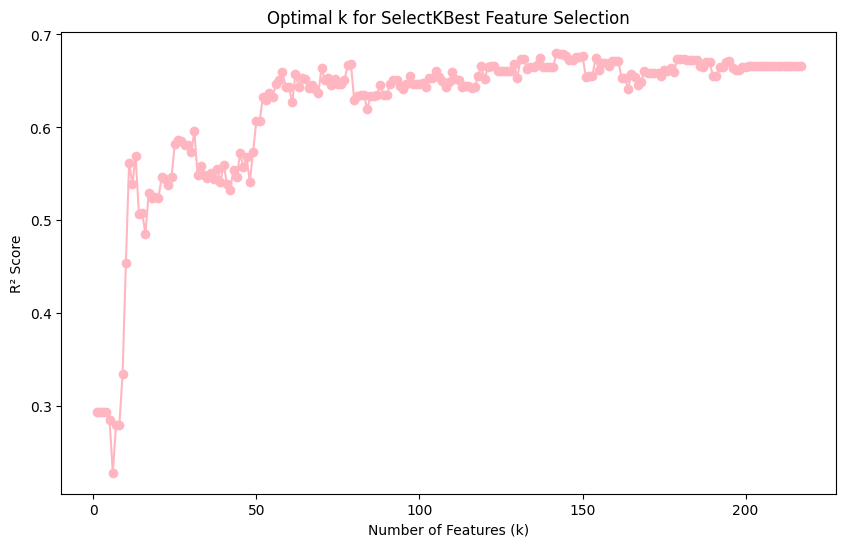

Plot saved as optimalkvalue.png


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
import pandas as pd
import os

# Define range of k values (from 1 to total number of features, step 1)
k_values = list(range(1, X_train_scaled_df.shape[1] + 1))

# Store R² scores for each k
r2_scores = []

# Loop through k values and train LGBMRegressor
for k in k_values:
    # Select top k features
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train_scaled_df, y_train)
    X_valid_selected = selector.transform(X_valid_scaled_df)

    # Convert selected features back to DataFrame to retain feature names
    selected_features = X_train_scaled_df.columns[selector.get_support()]
    X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features)
    X_valid_selected_df = pd.DataFrame(X_valid_selected, columns=selected_features)

    # Train LGBMRegressor with selected features
    model = LGBMRegressor(
        learning_rate=0.045,
        max_depth=9,
        min_child_samples=5,
        n_estimators=250,
        num_leaves=15,
        random_state=42,
        verbose=-1
    )
    model.fit(X_train_selected_df, y_train)

    # Make predictions
    y_preds = model.predict(X_valid_selected_df)

    # Compute R² score
    r2 = r2_score(y_valid, y_preds)
    r2_scores.append(r2)

# Find the optimal k value
optimal_k = k_values[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

# Print optimal k value with highest R²
print(f"Optimal k: {optimal_k} with Highest R²: {best_r2:.4f}")

# Plot R² Scores vs. k Values
plt.figure(figsize=(10, 6))
plt.plot(k_values, r2_scores, marker='o', linestyle='-', color='lightpink')
plt.xlabel("Number of Features (k)", color="black")
plt.ylabel("R² Score", color="black")
plt.title("Optimal k for SelectKBest Feature Selection", color="black")
plt.gca().set_facecolor('white')  # Set background to white
plt.tick_params(axis='both', colors='black')  # Set axes color to black

# Define save path in the specified folder
save_path = os.path.join("..", "notebooks", "Plots", "optimalkvalue.png")

# Save figure as PNG in the correct directory
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

# Success message
print("Plot saved as optimalkvalue.png")


💪🏻 Let's plot the data with the optimized machine leaning parameters of this model!

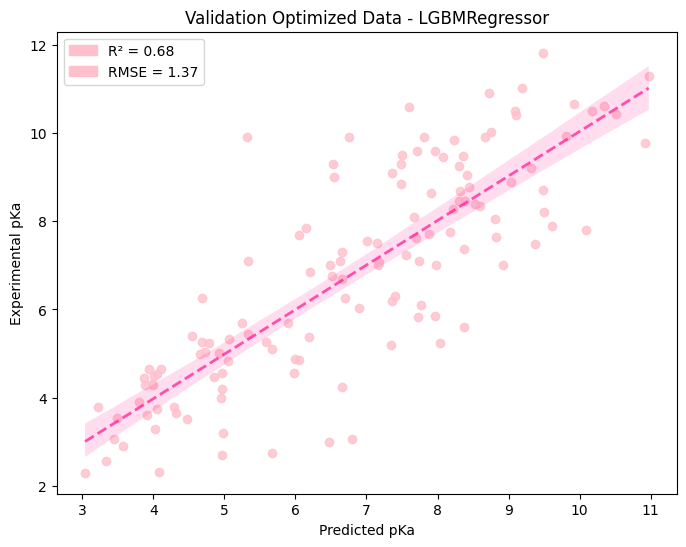

Plot saved as validationoptimized_LGBMRegressor.png


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.patches as mpatches
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import os

# =============================
# Feature Selection with SelectKBest (k=142)
# =============================

k = 142  # Optimized number of best features for LGBMRegressor
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled_df, y_train)
X_valid_selected = selector.transform(X_valid_scaled_df)

# Convert selected features back to DataFrame to retain feature names
selected_features = X_train_scaled_df.columns[selector.get_support()]
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features)
X_valid_selected_df = pd.DataFrame(X_valid_selected, columns=selected_features)

# =============================
# Train LGBMRegressor with Optimized Parameters
# =============================

# Define the best parameters found from GridSearchCV
best_params = {
    'learning_rate': 0.045,
    'max_depth': 9,
    'min_child_samples': 5,
    'n_estimators': 250,
    'num_leaves': 15
}

# Initialize the model with optimized parameters
model = LGBMRegressor(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_child_samples=best_params['min_child_samples'],
    n_estimators=best_params['n_estimators'],
    num_leaves=best_params['num_leaves'],
    random_state=42,
    verbose=-1
)

# Train the model on the selected features
model.fit(X_train_selected_df, y_train)

# Make predictions on the validation set
y_preds = model.predict(X_valid_selected_df)

# =============================
# Define Function for Plotting
# =============================

def plot_data(actual, predicted, title, save_path, show_plot=True):
    """Plots predicted vs actual pKa values with regression line and evaluation metrics."""
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    R2 = r2_score(actual, predicted)

    plt.figure(figsize=(8, 6))
    sn.regplot(x=predicted, y=actual, scatter_kws={'color': 'pink'}, line_kws={"lw": 2, "ls": "--", "color": "deeppink", "alpha": 0.7})
    plt.title(title, color="black")
    plt.xlabel("Predicted pKa", color="black")
    plt.ylabel("Experimental pKa", color="black")
    plt.gca().set_facecolor('white')  # Set background to white

    # Add R² and RMSE patches to legend
    R2_patch = mpatches.Patch(color='pink', label=f"R² = {R2:.2f}")
    rmse_patch = mpatches.Patch(color='pink', label=f"RMSE = {rmse:.2f}")
    plt.legend(handles=[R2_patch, rmse_patch])

    # Save figure
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Show plot if required
    if show_plot:
        plt.show()
    else:
        plt.close()

# =============================
# Plot and Save Results
# =============================

# Define save path in the specified folder
save_path = os.path.join("..", "notebooks", "Plots", "validationoptimized_LGBMRegressor.png")

# Plot validation results and display the plot
plot_data(y_valid, y_preds, "Validation Optimized Data - LGBMRegressor", save_path, show_plot=True)

# Success message
print("Plot saved as validationoptimized_LGBMRegressor.png")


In [65]:
from scipy import stats
import numpy as np
import pandas as pd
import os
import IPython.display as ipd

# Compute mean error
mean_error2 = np.mean(y_preds - y_valid)

# Compute variance of the error
variance_error2 = np.var(y_preds - y_valid)

# Compute mean predicted value
mean_predicted2 = np.mean(y_preds)

# Compute Mean Squared Error (MSE)
mse2 = mean_squared_error(y_valid, y_preds)

# Compute R² score
r2_2 = r2_score(y_valid, y_preds)

# Compute 95% confidence interval for predictions
confidence2 = 0.95
n = len(y_preds)
std_err2 = stats.sem(y_preds - y_valid)
margin_of_error2 = std_err2 * stats.t.ppf((1 + confidence2) / 2., n-1)
confidence_interval2 = (mean_error2 - margin_of_error2, mean_error2 + margin_of_error2)

# Print computed metrics
print(f"Mean Error: {mean_error2:.4f}")
print(f"Variance of Error: {variance_error2:.4f}")
print(f"Mean Predicted Value: {mean_predicted2:.4f}")
print(f"MSE: {mse2:.4f}")
print(f"R²: {r2_2:.4f}")
print(f"95% Confidence Interval: {confidence_interval2}")

# Create a DataFrame for storing the results
stats_df = pd.DataFrame({
    "Metric": ["Mean Error", "Variance", "Mean Predicted Value", "MSE", "R²", "95% CI Lower", "95% CI Upper"],
    "Value": [mean_error2, variance_error2, mean_predicted2, mse2, r2_2, confidence_interval2[0], confidence_interval2[1]]
})

# Define save path dynamically
save_path = os.path.join("..", "data","LGBM_regressor_stats.csv")
stats_df.to_csv(save_path, index=False)
print(f"Table saved at: {save_path}")

# Display as an interactive HTML table
ipd.display(ipd.HTML(stats_df.to_html(classes='table table-striped', escape=False)))




Mean Error: -0.0047
Variance of Error: 1.8835
Mean Predicted Value: 6.7829
MSE: 1.8835
R²: 0.6803
95% Confidence Interval: (np.float64(-0.2437992226025819), np.float64(0.23434515460957062))
Table saved at: ../data/LGBM_regressor_stats.csv


,Metric,Value
0,Mean Error,-0.004727
1,Variance,1.883497
2,Mean Predicted Value,6.782927
3,MSE,1.883519
4,R²,0.680337
5,95% CI Lower,-0.243799
6,95% CI Upper,0.234345


## 🧐 *Comparison of the two machine learning models*

When evaluating the machine learning models for pKa prediction, R² (coefficient of determination) and RMSE (Root Mean Squared Error) are two key metrics used to assess model performance. R² measures how well the model explains the variance in the experimental pKa values, ranging from 0 (no predictive power) to 1 (perfect prediction). RMSE quantifies the average difference between predicted and actual values, with lower RMSE indicating more accurate predictions.

Initially, ExtraTreesRegressor and LGBMRegressor emerged as the top performers based on their R² scores. However, the final figures demonstrate that both models benefited from hyperparameter tuning and the optimization of k, the number of most relevant descriptors selected using SelectKBest. After optimization, LGBMRegressor achieved the best performance with an R² of 0.68 and an RMSE of 1.37, while ExtraTreesRegressor followed closely with an R² of 0.67 and an RMSE of 1.39. The scatter plots confirm strong correlations between predicted and experimental pKa values, with the optimized models producing more accurate and reliable predictions. 

Figure saved at: ../notebooks/plots/model_comparison_stats.png


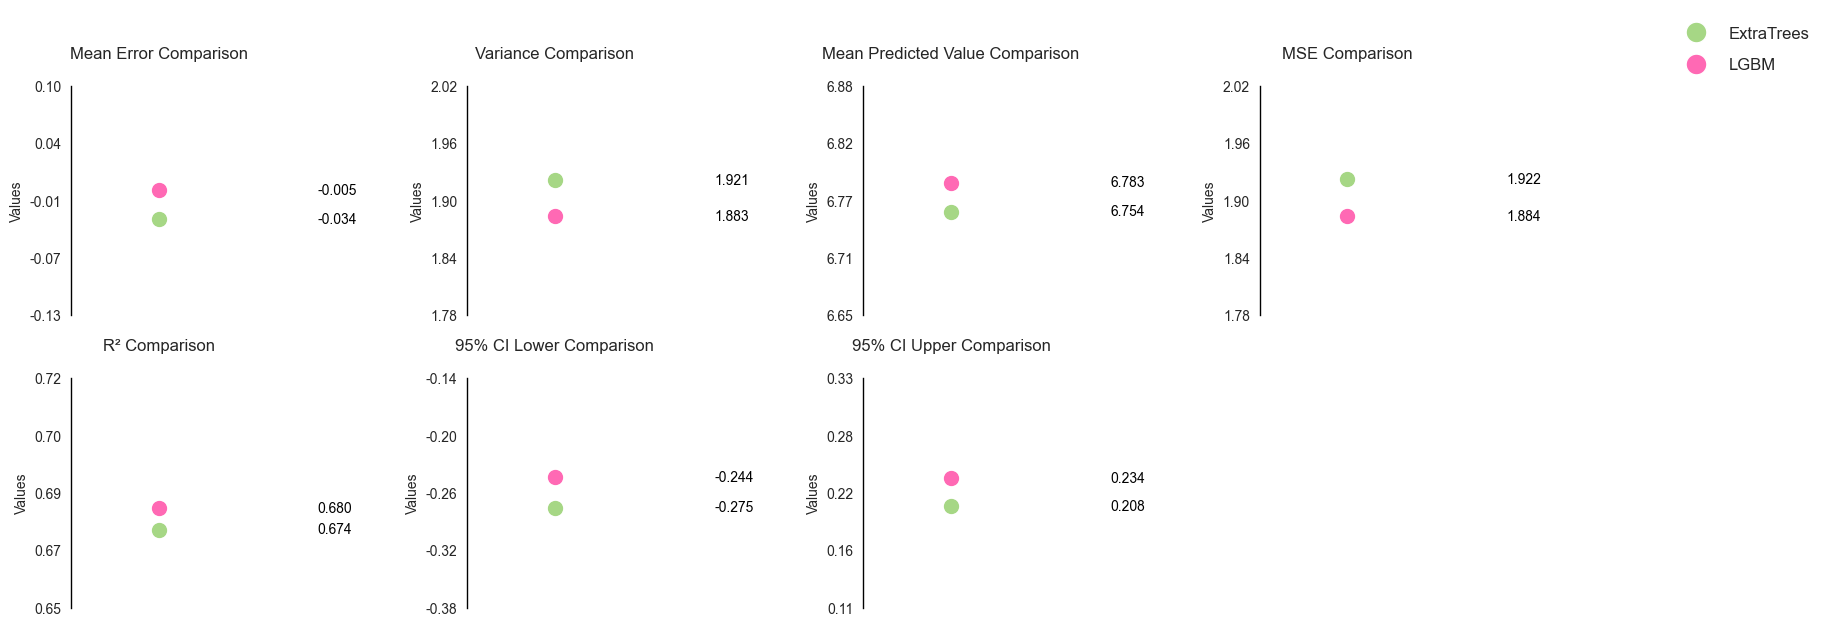

In [94]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define file paths
path1 = os.path.join("..", "data", "ExtraTreesRegressor_stats.csv")
path2 = os.path.join("..", "data", "LGBM_regressor_stats.csv")

# Load data
extra_trees_df = pd.read_csv(path1)
lgbm_df = pd.read_csv(path2)

# Merge data for comparison
comparison_df = extra_trees_df.merge(lgbm_df, on="Metric", suffixes=("_ExtraTrees", "_LGBM"))

# Define metrics and values
metrics = comparison_df["Metric"]
values_extra_trees = comparison_df["Value_ExtraTrees"]
values_lgbm = comparison_df["Value_LGBM"]

# Set up subplot grid (4 columns, 3 rows)
n_cols = 4
n_rows = int(np.ceil(len(metrics) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), sharey=False, facecolor='white')
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    x_center = 0.5  # Center the points in the plot
    colors = ['#A6D785', '#FF69B4']  # Matcha green for ExtraTrees, pink for LGBM
    labels = ["ExtraTrees", "LGBM"]
    values = [values_extra_trees[i], values_lgbm[i]]
    
    # Set specific y-axis limits for R²
    if metric == "R²":
        y_min, y_max = 0.65, 0.72
    else:
        # Round y-axis values for cleaner display
        rounded_values = [round(val, 2) for val in values]
        y_min, y_max = min(rounded_values) - 0.1, max(rounded_values) + 0.1
    ax.set_ylim(y_min, y_max)
    
    # Remove all lines except a single solid y-axis line
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.grid(False)  # Remove main grid
    
    # Set y-axis ticks with small horizontal markers
    y_ticks = np.linspace(y_min, y_max, num=5)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f"{tick:.2f}" for tick in y_ticks], fontsize=10)
    
    # Plot points and numbers grouped together with values to the right of the balls
    for j, val in enumerate(values):
        ax.scatter(x_center, val, color=colors[j], s=100)
        ax.text(x_center + 0.05, val, f"{val:.3f}", ha='left', va='center', fontsize=10, color='black')
    
    ax.set_xticks([])  # Remove x-axis labels
    ax.set_ylabel("Values")  # Restore y-axis label
    ax.set_title(f"{metric} Comparison", pad=20)
    ax.set_facecolor('white')  # Remove background color

# Add global legend at the top right corner with correct colors
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], markersize=10, label="ExtraTrees"),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=10, label="LGBM")]
fig.legend(handles=legend_handles, loc="upper right", bbox_to_anchor=(1.15, 1.05), frameon=False, markerscale=1.5, fontsize=12, 
           handletextpad=1, labelspacing=1, borderpad=1)

# Hide unused subplots
for i in range(len(metrics), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()


# Define save path
save_path = os.path.join("..", "notebooks", "plots", "model_comparison_stats.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved at: {save_path}")
plt.show()




The comparative analysis between the ExtraTrees and LGBM models reveals distinct performance characteristics across key evaluation metrics.

**Mean Error** : The ExtraTrees model shows a slightly larger absolute error (-0.034) compared to LGBM (-0.005), indicating that LGBM produces predictions that are closer to the expected values on average.

**Variance**: The variance is comparable between both models, with ExtraTrees exhibiting 1.921 and LGBM 1.883, suggesting similar levels of model variability.

**Mean Predicted Value**: Both models yield nearly identical predicted values, with LGBM slightly higher at 6.783 compared to 6.754 for ExtraTrees.

**Mean Squared Error (MSE)**: ExtraTrees has a marginally higher MSE (1.922) compared to LGBM (1.884), suggesting that the LGBM model achieves slightly better prediction accuracy.

**R² Score**: The ExtraTrees model has an R² of 0.674, while LGBM scores 0.680, reinforcing that both models explain the variance in the data quite well, but LGBM performs slightly better in this regard.

**Confidence Intervals**:

The 95% CI lower bound is slightly lower for ExtraTrees (-0.275) than for LGBM (-0.244).
The 95% CI upper bound is 0.208 for ExtraTrees and 0.234 for LGBM, indicating a slightly wider confidence interval for LGBM.
Conclusion
While both models exhibit comparable performance, LGBM slightly outperforms ExtraTrees in most metrics, particularly in terms of lower mean error, higher R², and marginally better MSE. However, the differences are not drastic, and the choice between these models may depend on factors such as computational efficiency and interpretability.